## Course Name :- Time Series Analysis ~ MTH333
### Course Instructor : Dr. Saurav Trivedi 
### Author Name : Nishant Kumar [ 1904123 ]

#### We refer to a series of data points indexed (or graphed) in time order as a ```time series```. A time series can be broken down into 3 components.
- Trend: Upward & downward movement of the data with time over a large period of time.
- Seasonality: Seasonal variance (i.e. an increase in demand for ice cream during summer)
- Noise: Spikes & troughs at random intervals.

Let's import few required libraries for ```Time Series Analysis```.

In [1]:
from statsmodels.tsa.stattools import acf, pacf, acovf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import astsadata
import time

c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarni

#### Reading silver prices dataset using pandas.

In [2]:
df = pd.read_csv("Silver.csv")
df.head()

,Date,Close,Volume,Open,High,Low
0,12/31/2021,23.352,28585.0,23.095,23.390,23.070
1,12/30/2021,23.060,29796.0,22.870,23.155,22.630
2,12/29/2021,22.858,39201.0,23.050,23.185,22.600
3,12/28/2021,23.121,41202.0,23.105,23.480,23.005
4,12/27/2021,22.989,37238.0,22.900,23.150,22.655


In [3]:
df = df.loc[::-1].reset_index(drop = True)
df.head()

,Date,Close,Volume,Open,High,Low
0,01/02/2019,15.649,85737.0,15.550,15.680,15.385
1,01/03/2019,15.797,85782.0,15.630,15.815,15.550
2,01/04/2019,15.786,94060.0,15.805,15.955,15.645
3,01/07/2019,15.756,52485.0,15.800,15.880,15.680
4,01/08/2019,15.713,61158.0,15.725,15.745,15.560


### Initial plot of time series.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


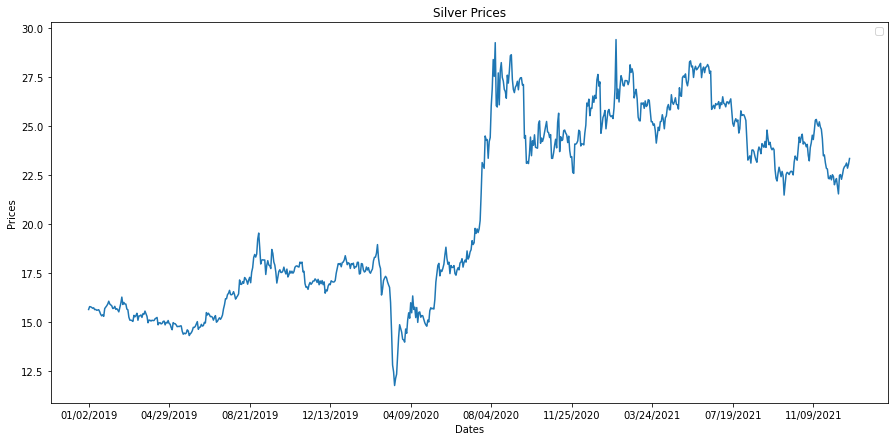

In [4]:
plt.figure(figsize=(15, 7))
plt.title('Silver Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'])
plt.xticks(np.arange(0, 755, 80), df['Date'][0: 755: 80])
plt.legend()
plt.show()

- Above plot has upward trend which seems like It is not stationary.

### Simulating volatility of the time series.

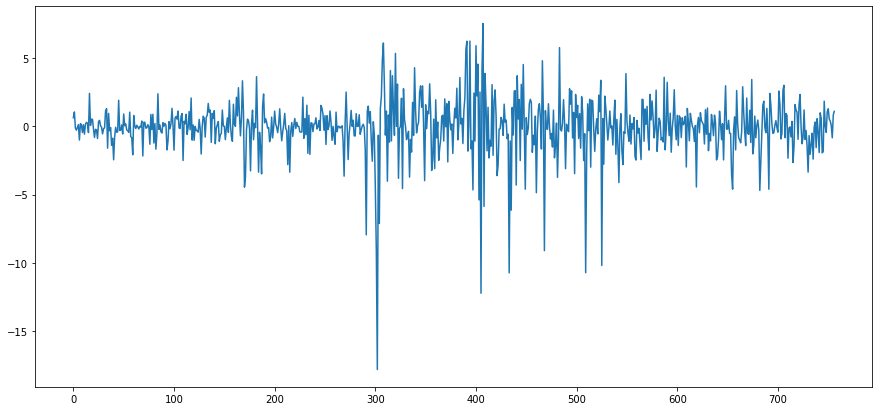

In [5]:
df["Volatility"] = ((df["Close"] - df["Open"]) / df["Close"]) * 100
plt.figure(figsize = (15, 7))
plt.plot(df["Volatility"])
plt.show()

In [6]:
mean_of_deviation_per_day =  np.abs(np.mean(df["Volatility"]))
print("The volatility of the time series is :", mean_of_deviation_per_day)

The volatility of the time series is : 0.08177755807543807


In [7]:
mean_of_close_per_day = np.abs(np.mean(df["Close"]))
Percentage_volatilty = (mean_of_deviation_per_day / mean_of_close_per_day) * 100
print("The Percentage volatilty of the time series is :", Percentage_volatilty, "%")

The Percentage volatilty of the time series is : 0.3950663901097784 %


#### Results :-
- The volatility in the time series is around 0.3950663901097784 %, which seems to be less.
- Ideally, volatility greater than 2-3 % use to be considerable.

### Before applying any statistical model on a time series, we want to ensure it’s stationarity.

#### Check for ```Stationarity``` of Time Series.
#### A ```Time Series``` is said to be stationary if its statistical properties such as mean, variance remain constant over time and an autocovariance that does not depend on time

#### There are ```two``` primary way to determine whether a given time series is ```stationary```.
- ```Rolling Statistics```: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis).


- ```Augmented Dickey-Fuller Test```: The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ```ADF Statistics```.

### Stationarity Test :- ```Dickey-Fuller Test```

#### The function ```‘adfuller’``` returns a ```5-tuple (a0, . . . , a4)```where:
- a0: ADF statistics
- a1: Probability that null hypothesis will not be rejected (p-value)
- a2: Number of lags
- a3: Number of observations used
- a4: Critical values at 1%, 5% and 10% confidence intervals corresponding to adfuller test

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

- ```Null Hypothesis (H0)```: Time series has a unit root. (Time series is not stationary).

- ```Alternate Hypothesis (H1)```: Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary.
    
#### There are two ways to rejects the ```null hypothesis```:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

- ```p-value > significance``` level (default: ```0.05```) : Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- ```p-value <= significance``` level (default: ```0.05```) : Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

- ```ADF statistic > critical value``` : Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- ```ADF statistic < critical value``` : Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [8]:
def test_stationarity(timeseries):
    #Determining rolling statistics:
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    
    #plotting rolling statistics:
    plt.figure(figsize = (15, 7))
    plt.xticks(np.arange(0, 755, 80), df['Date'][0: 755: 80])
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0 : 4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

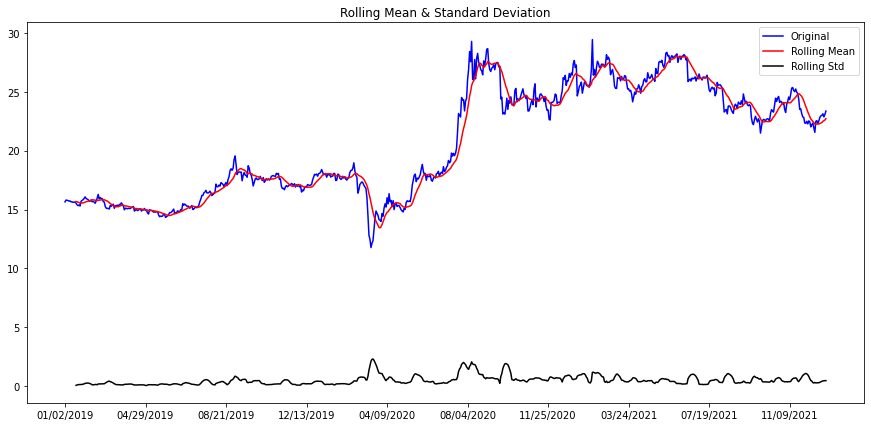

Results of Dickey-Fuller Test:
Test Statistic                  -1.515721
p-value                          0.525720
#Lags Used                      16.000000
Number of Observations Used    740.000000
Critical Value (1%)             -3.439218
Critical Value (5%)             -2.865454
Critical Value (10%)            -2.568854
dtype: float64


In [9]:
test_stationarity(df["Close"])

#### Results of above ```stationarity Test ```:-
- As ```a0``` is greater than all of the critical values in ```a4``` and also ```P``` values is significant and higher than ```0.05```. Hence, Null hypothesis cannot be rejected implies time seires is not stationary.


- In ```rolling statistics``` standard deviation has very less variation but mean is not constant. Hence, it's not a stationary series. Also, the test statistic is way more than the critical values (compare signed values and not the absolute values).

### Transforming Time Series to make Stationary.

If the data is not stationary but we want to use a model that requires with characteristic, the data has to be transformed. However, if the data is not stationary to begin with, we should rethink the choice of model.

The two most common methods to achieve stationarity are:

- ```Transformation```: e.g. log or square root to stabilize non-constant variance


- ```Differencing```: subtracts the current value from the previous

**```Differencing```** can be done in different orders:

- ```First order differencing```: linear trends with  zi = yi−yi−1 


- ```Second-order differencing```: quadratic trends with  zi = (yi−yi-1)−(yi−1−yi−2) 


- and so on...

Lets first understand what is making a Time Series non-stationary. There are 2 major reasons behind non-stationarity of a TS:

- ```Trend``` – varying mean over time. For eg, in this case we saw that on average, the price of silver is varying over time.


- ```Seasonality``` – variations at specific time-frames. eg people might have a tendency to buy silver in a particular month because of pay increment or festivals.

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then statistical forecasting techniques can be implemented on this series. The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

### Applying ```log transformation and differecing``` to make time series stationary. 
- Taking log of the original time series in log transformation.


- For differencing, we will have to find order of differencing.


#### How to find the ```best order of differencing (d)``` in ARIMA model.



- As stated earlier, the purpose of differencing is to make the time series stationary. But we should be careful to not over-difference the series. An over differenced series may still be stationary, which in turn will affect the model parameters.


- So we should determine the right order of differencing. The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.


- If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.


- If we can’t really decide between two orders of differencing, then we go with the order that gives the least standard deviation in the differenced series.

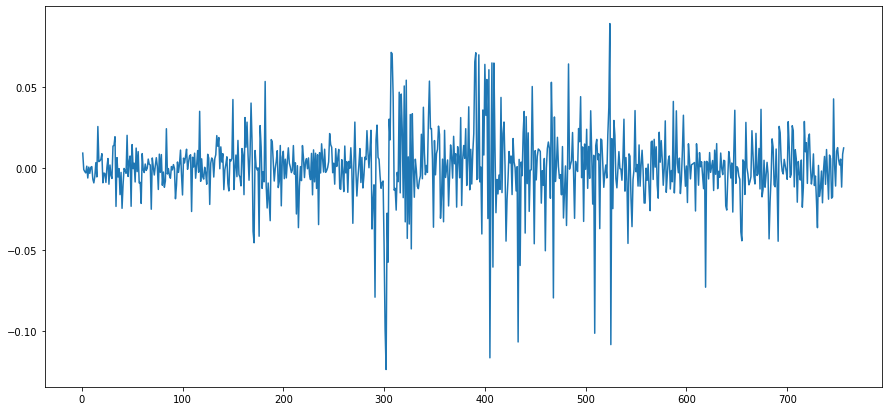

In [10]:
data = np.log(df["Close"])
df["New_Close"] = data.diff(1)

plt.figure(figsize=(15, 7))
plt.plot(df["New_Close"])
plt.show()

### Confirming ```Stationarity``` of time series after transformation and differencing.

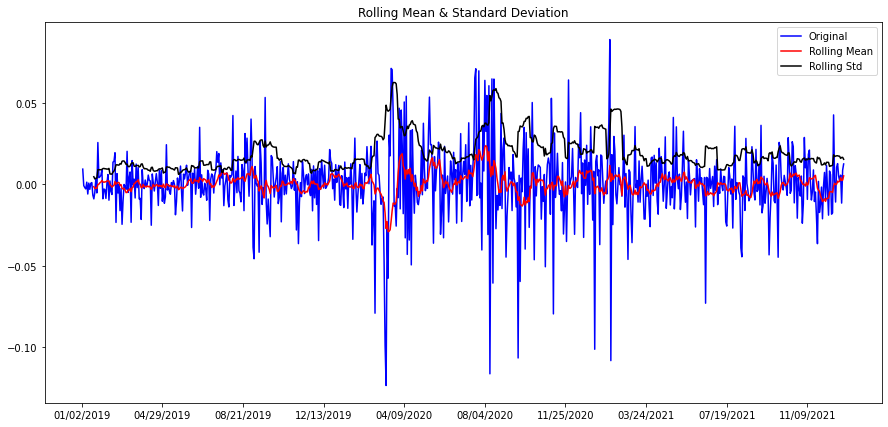

Results of Dickey-Fuller Test:
Test Statistic                -1.436476e+01
p-value                        9.714521e-27
#Lags Used                     3.000000e+00
Number of Observations Used    7.520000e+02
Critical Value (1%)           -3.439076e+00
Critical Value (5%)           -2.865391e+00
Critical Value (10%)          -2.568821e+00
dtype: float64


In [11]:
test_stationarity(data.diff(1)[1:])

#### After taking ```log and differencing```, the ```p-value``` is extremely small. Thus this series is very likely to be stationary.
- The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ```ADF Statistics```.



### Plot of ACF and PACF of the time series to find the parameter of the best model.
#### Let’s understand what do we mean by ```ACF and PACF``` first,
- ```ACF``` is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. In simple terms, it describes how well the present value of the series is related with its past values.A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.


- ```PACF``` is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. 

Autocorrelation helps in detecting seasonality.

#### ```How to find the order of the AR term (p)```


- The next step is to identify if the model needs any AR terms. We will find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.


- Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. This way, we will know if that lag is needed in the AR term or not.


- Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.


$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.


- Now, we should find the number of AR terms. Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

#### ```How to find the order of the MA term (q)```


- Just like how we looked at the PACF plot for the number of AR terms, we will look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.


- The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

In [12]:
# Plot acf and pacf for silver dataset
def plot_acf_and_pacf(data):
    lags = 60
    plt.figure(figsize=(15, 5))
    plot_acf(data, ax=plt.gca(), lags = 25)
    
    plt.figure(figsize=(15, 5))
    plot_pacf(data, ax=plt.gca(), method='ywm', lags = 25) 

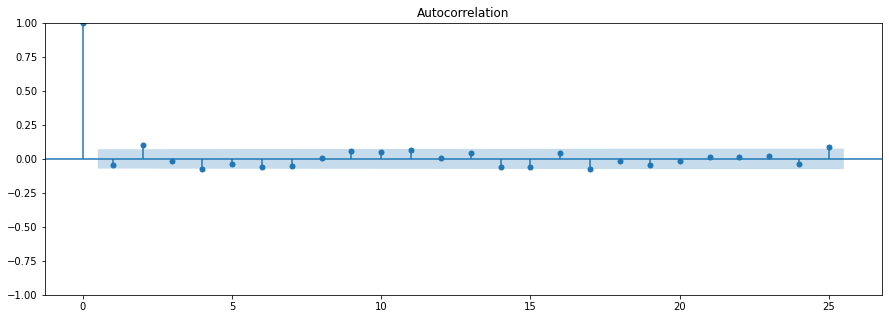

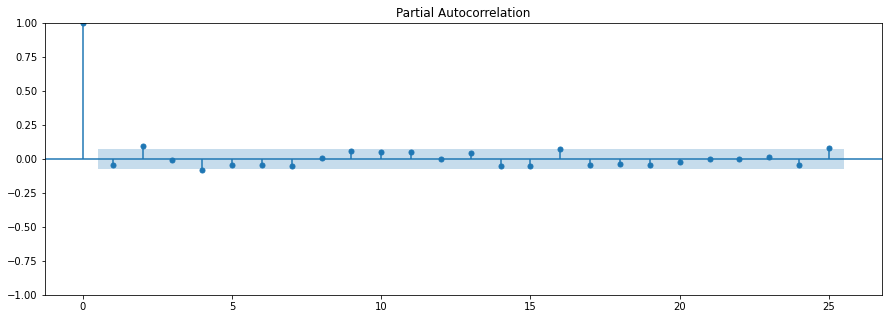

In [13]:
plot_acf_and_pacf(df["New_Close"][1:])

- From the above plot p could be 1 and q could be 1, but to choose the best, we will run the model on an around the the guessed value from ACF and PACF plot. 

### There is no indication of ```seasonality```. Hence, based on AR, MA and differencing terms, ```ARIMA``` is the best candidate to fit the data in.

#### The ARIMA model predicts a given time series based on its own past values. It can be used for any nonseasonal series of numbers that exhibits patterns and is not a series of random events.

#### * Configuring an ARIMA Model, The ARIMA (aka Box-Jenkins) model adds differencing to an ARMA model.

The future value of a variable in ARIMA model is a combination of linear to the past values and
errors, expressed as follows:

$$ Yt = ϕ_0 + ϕ_1Yt_1 + ϕ_2Yt_2 + … + ϕ_pYt_p + ε_t − θ_1εt_2 − … − θ_qεt_q $$

where, Yt is the actual value and Et is the random error at t, ϕi and θj are the coefficients, p and q are integers that are often
referred to as autoregressive and moving average, respectively.

### **ARIMA model in words**:


- ```Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)```

This is a process that uses time series analysis and diagnostics to discover good parameters for the ARIMA model.

In summary, the steps of this process are as follows:

- Model Identification. Use plots and summary statistics to identify trends, seasonality, and autoregression elements to get an idea of the amount of differencing and the size of the lag that will be required.


- Parameter Estimation. Use a fitting procedure to find the coefficients of the regression model.


- Model Checking. Use plots and statistical tests of the residual errors to determine the amount and type of temporal structure not captured by the model.

The process is repeated until either a desirable level of fit is achieved on the in-sample or out-of-sample observations (e.g. training or test datasets).

* Given that the model can be fit efficiently on modest-sized time series datasets, grid searching parameters of the model can be a valuable approach.

#### Based on above plot, best parameter of ```Arima``` could belongs to , $$ p, d, q \in [0, 3] $$
#### Let's fit model and tune for the best parameter.

In [14]:
#Storing the models for all the expected orders
orders = [(i, k, j) for i in range(3) for k in range(3) for j in range(3)]

def fit_ARIMA_model(orders):
    fitted_model = []
    for i in range(len(orders)):
        fitted_model.append(ARIMA(df["Close"], order = orders[i], trend = 'n'))
    
    model = []
    for i in range(len(orders)):
        model.append(fitted_model[i].fit())
    
    return model

fitted_model_results = fit_ARIMA_model(orders)

c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\nisha\appdata\local\programs\python\python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting auto

#### ```Hyperparameter Tuning based on AIC values```.
Let's understand what is AIC first,
- The AIC function is ```2K – 2(log-likelihood)```. Lower AIC values indicate a better-fit model, and a model with a delta-AIC (the difference between the two AIC values being compared) of more than -2 is considered significantly better than the model it is being compared to.


- In statistics, ```AIC``` is most often used for model selection. By calculating and comparing the AIC scores of several possible models, you can choose the one that is the best fit for the data.

In [15]:
#Tuning q, d, q for the best model
def Hyperparameter_Tuning(model, orders): 
    mn = 100000000000
    p, d, q = 0, 0, 0
    print("Model AIC          p,  d,  q")
    for i in range(len(orders)):
        print(model[i].aic, orders[i])
        if mn > model[i].aic:
           mn = model[i].aic
           p, d, q = orders[i]
    
    
    print("\n\nThe best to fit in ARIMA is :-")
    print("* AIC of the best model = ", mn)
    print("* p =", p)
    print("* d =", d)
    print("* q =", q)

Hyperparameter_Tuning(fitted_model_results, orders)

Model AIC          p,  d,  q
6774.7603894361055 (0, 0, 0)
5758.644846811227 (0, 0, 1)
4888.554892449865 (0, 0, 2)
1052.6165284958338 (0, 1, 0)
1044.2443027224954 (0, 1, 1)
1043.9474335088703 (0, 1, 2)
1662.289171795039 (0, 2, 0)
1060.5206015655608 (0, 2, 1)
1052.3090103561303 (0, 2, 2)
1063.3363551513257 (1, 0, 0)
1054.9844146366668 (1, 0, 1)
1054.6788695203586 (1, 0, 2)
1043.2794963159783 (1, 1, 0)
1044.3510587088576 (1, 1, 1)
1045.7658117074382 (1, 1, 2)
1356.2891225499156 (1, 2, 0)
1051.341087468343 (1, 2, 1)
1052.3871982401051 (1, 2, 2)
1054.0193025775136 (2, 0, 0)
1055.088257111236 (2, 0, 1)
1058.966257852777 (2, 0, 2)
1044.0106970336956 (2, 1, 0)
1046.0109558044892 (2, 1, 1)
1044.7119327025657 (2, 1, 2)
1265.3507299420555 (2, 2, 0)
1052.0205042921002 (2, 2, 1)
1055.3381178530237 (2, 2, 2)


The best to fit in ARIMA is :-
* AIC of the best model =  1043.2794963159783
* p = 1
* d = 1
* q = 0


###  Based on ```AIC``` values, ```p = 1, d = 1, q = 0``` is the best candidate for ```ARIMA``` Model.
p = The number of lag observations included in the model, also called the lag order.

d = The number of times that the raw observations are differenced, also called the degree of differencing.

q = The size of the moving average window, also called the order of moving average.

In [16]:
p = 1
d = 1
q = 0

### Fitting arima using tuned parameter.

In [17]:
model = ARIMA(df["Close"], order = (1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  757
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -519.640
Date:                Fri, 06 May 2022   AIC                           1043.279
Time:                        16:18:51   BIC                           1052.536
Sample:                             0   HQIC                          1046.845
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1221      0.021     -5.954      0.000      -0.162      -0.082
sigma2         0.2315      0.005     42.362      0.000       0.221       0.242
Ljung-Box (L1) (Q):                   0.01   Jarque-

- Time series has 1 order of differencing shows ```stationarity.```
- P values of the AR terms in ARIMA is ```zero```, ideally, should less than ```0.05```, Indicating the best fit.

### Dividing dataset into test and train to verify the accuracy of the ```fitted model```.

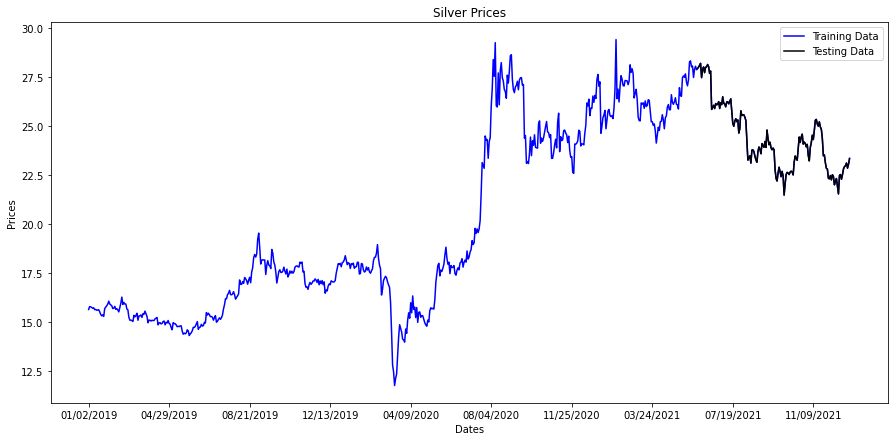

In [18]:
train_data, test_data = df[0 : int(len(df) * 0.8)], df[int(len(df) * 0.8) :]
plt.figure(figsize=(15, 7))
plt.title('Silver Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'black', label='Testing Data')
plt.xticks(np.arange(0, 755, 80), df['Date'][0: 755: 80])
plt.legend()
plt.show()

-  Above plot is to visualise test and train dataset.

#### Fitting model and calculating accuracy using ```MAPE ( Mean Absolute Percentage Error )```.

$$ MAPE =\frac{1}{n} *  \sum_{i=1}^{D}|\frac{(\hat{y}-y_i)}{y_i}|$$
$$ where, \hat{y} = Predicted  Values $$
    $$           y_i = Actual Values$$

In [19]:
def MAPE(Y_actual, Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/ Y_actual))
    return mape

In [20]:
def MSE(Y_actual, Y_Predicted):
    mse = np.mean(np.sqrt((Y_actual - Y_Predicted)**2))
    return mse

### ```Rolling Forecast ARIMA Model```
- A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. 


- We are spliting the training dataset into train and test sets, using the train set to fit the model, and generating a prediction for each element on the test set. 


- We manually keeping track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration. 

Let's see the implimentation below :-

In [21]:
train_ar = train_data["Close"].values
test_ar = test_data["Close"].values

history = [x for x in train_ar]

predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order = (1, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
   
mape = MAPE(test_ar, predictions)
print('Mean Absolute Percentage Error: %.3f' % mape)
mse = MSE(test_ar, predictions)
print('Mean Squared Error: %.3f' % mse)

Mean Absolute Percentage Error: 0.012
Mean Squared Error: 0.284


#### Results :- 
- Around ```1.2 % MAPE``` implies the model is about ```98.8 %``` accurate in predicting the next ```150``` observations.


- Mean Squared Error signifies the goodness of the model. Lower the MSE, better the model is. ```Mean Squared Error``` is around ```0.284```, confirms better model.



- ```Mean Absolute Percentage Error``` of model is ```1.2 %``` which is not significant. This means our prediction is very accurate. Hence, ```ARIMA(1, 1, 0)``` is the best fit for forecasting Silver Prices in future.

### Forecasting Silver Prices on Test Dataset. 

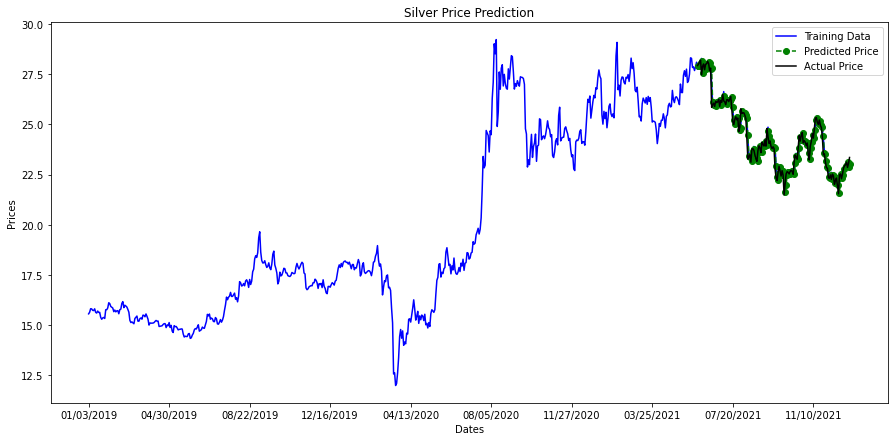

In [22]:
plt.figure(figsize=(15, 7))
plt.plot(df['Open'], color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='black', label='Actual Price')
plt.title('Silver Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0, 755, 80), df[1:]['Date'][0: 755: 80])
plt.legend()
plt.show()

### Plot of Forecasting [ Zooming the forecasting part ].

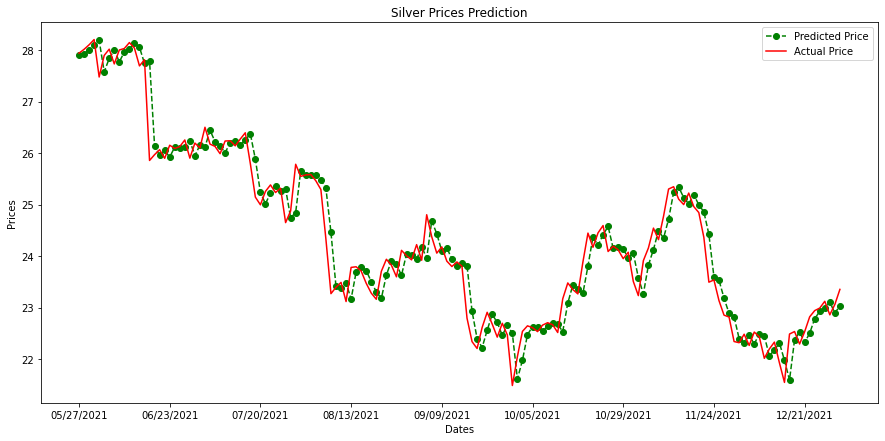

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xticks(np.arange(605, 755, 18), df['Date'][605: 755: 18])
plt.title('Silver Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

### Error plot of forecasted Silver Prices.

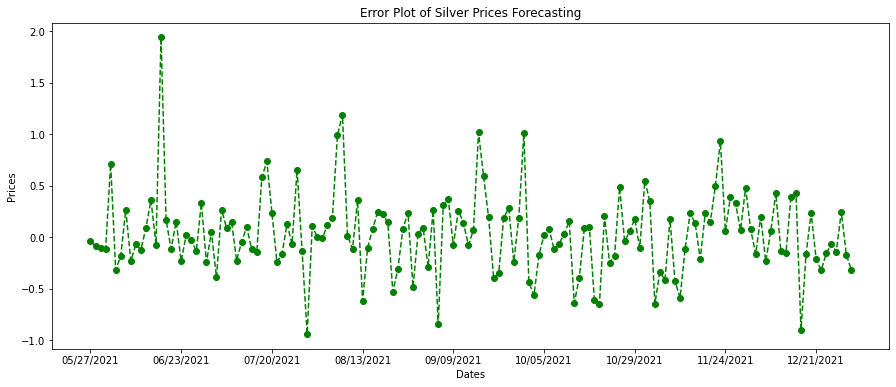

In [24]:
plt.figure(figsize = (15, 6))
data = predictions - test_data['Close'].values
plt.plot(test_data.index, data, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.xticks(np.arange(605, 755, 18), df['Date'][605: 755: 18])
plt.title('Error Plot of Silver Prices Forecasting')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.show()

## Key Observations :-
- The predicted values obtained from the ```dynamic forecasts``` yield an ```Mean Absolute Percentage Error``` of ```1.2 %``` and ```Mean Squared error``` of ```0.284```, both the ```MAPE and MSE``` of the forecast and dynamic forecasts plot confirm that this time series model is valid.


- The ```silver price``` seems to be increasing early, and less variation around mean for some period of time.


- The forecasting of Silver Prices on ```ARIMA (1, 1, 0)``` showed continuity in value.


- ```Arima model``` could be the best model for predicting prices for Silver, Gold, stock prices etc. in future.


- There is no seasonlity in the data, Hence ```ARIMA``` is the best fit which includes ```AR, MA and differencing``` which can be seen in Silver price data.


- The ```ARIMA model``` uses differenced data to make the data stationary, which means there's a consistency of the data over time.



- ```Error plot``` for predictions has very less variations shows ```high accuracy``` of the model.


- The results show that the model used can reflect the true silver price trend to a certain extent and can provide consumers with a certain guiding role in ```silver investment```. 


- There is a limitation of ```ARIMA model```, it can just forecast immediate future, Hence it cannot be used for long time forecasting next to the available data.


### References :-

- https://medium.com/analytics-vidhya/time-series-forecasting-and-analysis-arima-and-seasonal-arima-cacaf61ae863


- https://www.analyticsvidhya.com/blog/2021/11/performing-time-series-analysis-using-arima-model-in-r/#:~:text=ARIMA%20is%20a%20form%20of,instead%20of%20through%20actual%20values.



- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/



- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


- https://analyticsindiamag.com/comprehensive-guide-to-time-series-analysis-using-arima/


- https://towardsdatascience.com/an-introduction-to-time-series-analysis-with-arima-a8b9c9a961fb


- https://otexts.com/fpp2/arima.html